## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Make a Data for Polynomial Regression**

In [2]:
# Generate X value
X = 6 * np.random.rand(200, 1) - 3

# y = 0.8X^2 + 0.9x + 2
# Generate the y values
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

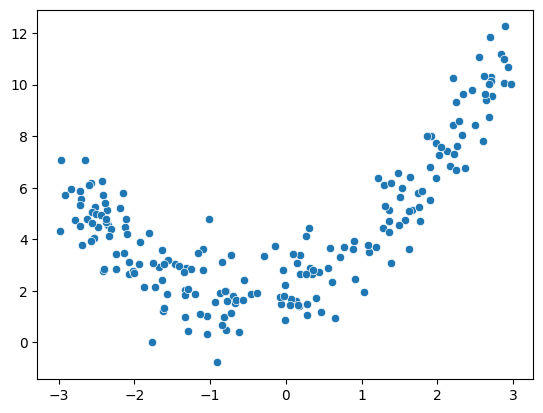

In [3]:
# Plot the data
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.show()

## **Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((140, 1), (60, 1))

## **Apply Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Instantiate a LinearRegressin object
lr = LinearRegression()

# Fit the data
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Print intercept and coefficient values
print("Coefficients:", lr.coef_)
print("intercept:", lr.intercept_)

Coefficients: [[0.95030278]]
intercept: [4.53617605]


In [9]:
# Predict the test data
y_pred = lr.predict(X_test)

In [10]:
# Calculate the R2 Score
from sklearn.metrics import r2_score

In [11]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.14087881346112108


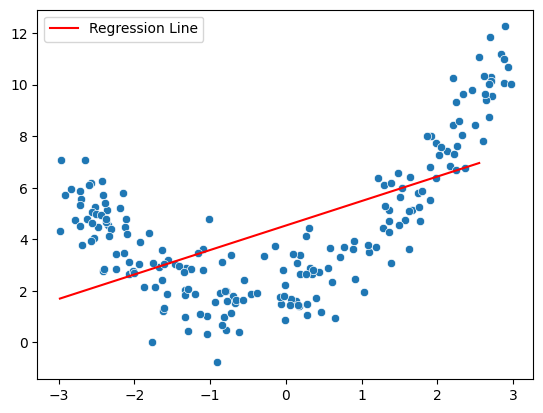

In [12]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
sns.lineplot(x=X_test.flatten(), y=lr.predict(X_test).flatten(), c="red", label="Regression Line")
plt.show()

## **Apply Polynomial Linear Regression**

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
# Extract polynomial features
# Degree = 2
# Include bias parameter
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

In [15]:
# Check the first 5 rows of transformed x_train array
print("Polynomial Features: X^0, X^1, X^2")
X_train_transformed[:5, :]

Polynomial Features: X^0, X^1, X^2


array([[ 1.        ,  2.71199377,  7.35491021],
       [ 1.        , -2.0158339 ,  4.06358632],
       [ 1.        , -2.24090286,  5.02164563],
       [ 1.        , -2.96558536,  8.79469654],
       [ 1.        ,  0.70757397,  0.50066092]])

In [16]:
# Instantiate a LinearRegression object for Polynomial Regression
poly_lr = LinearRegression()

# Fit the data
poly_lr.fit(X_train_transformed, y_train)

LinearRegression()

In [17]:
# Print intercept and coefficient values
print("Coefficients:", poly_lr.coef_)
print("intercept:", poly_lr.intercept_)

Coefficients: [[0.         0.85534032 0.80023114]]
intercept: [1.93956817]


In [18]:
# Predict the test data
y_pred = poly_lr.predict(X_test_transformed)

In [19]:
# Calculate the 'R2 Score'
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7799338841045592


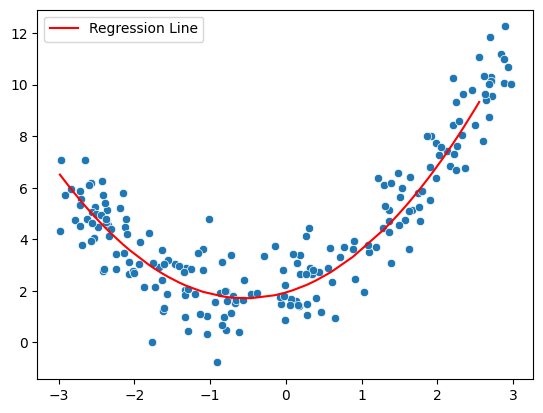

In [20]:
# Plot the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
sns.lineplot(x=X_test.flatten(), 
             y=poly_lr.predict(X_test_transformed).flatten(), 
             c="red", label="Regression Line")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [51]:
# Write a function to see the effect of degree in polynomial regression
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, "r", label="Degree "+str(degree), linewidth=2)
    
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="best")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

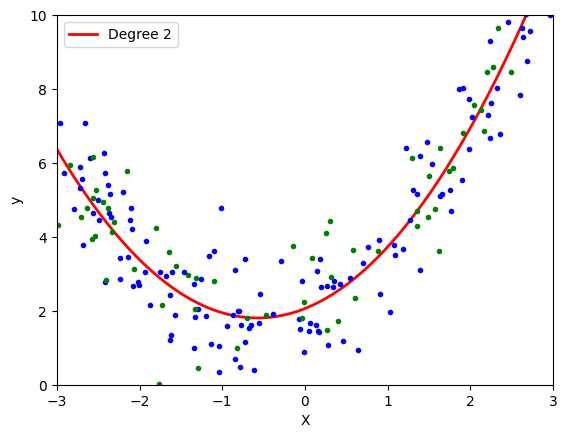

In [50]:
polynomial_regression(2)